In [1]:
from BasisFilter import BasisFilter
import pandas as pd
import os
import copy
import numpy as np
import re

In [2]:
BF = BasisFilter()
BF.path

'C:\\Users\\howsr\\workspace\\1_DataPreprocessing\\basis'

In [3]:
path = f'{BF.path}\\filtered_data\\김은주 원장님 자료'

In [4]:
NN = pd.read_excel(f'{BF.path}\\filtered_data\\김은주 원장님 자료\\비-비 환자 감량경과.xlsx')
NNN = pd.read_excel(f'{BF.path}\\filtered_data\\김은주 원장님 자료\\비-비-비 환자 감량경과.xlsx')
VV = pd.read_excel(f'{BF.path}\\filtered_data\\김은주 원장님 자료\\대-대 환자 감량경과.xlsx')
VVV = pd.read_excel(f'{BF.path}\\filtered_data\\김은주 원장님 자료\\대-대-대 환자 감량경과.xlsx')

In [9]:
NNN.columns.tolist()

['Visit',
 'Region',
 'ChartNo',
 'Age',
 'Sex',
 'Height',
 'Date_1',
 'MedicineName_1',
 'Memo_1',
 'Weight_1',
 'BMI_1',
 'ProgressNote_1',
 'Date_2',
 'Period_2',
 'MedicineName_2',
 'Memo_2',
 'Weight_2',
 'BMI_2',
 'ProgressNote_2',
 'Discomfort_2',
 'Date_3',
 'Period_3',
 'Weight_3',
 'BMI_3',
 'ProgressNote_3',
 'Discomfort_3']

In [42]:
VVV_weight = NNN[['Age','Sex','Weight_1','Weight_2','Period_2','Weight_3','Period_3']]
VVV_weight['Weight'] = VVV_weight['Weight_1']
VVV_weight['Loss_2'] = VVV_weight['Weight_1'] - VVV_weight['Weight_2']
VVV_weight['LossPerDay_2'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_2'])/VVV_weight['Period_2']
VVV_weight['PercentOfLoss_2'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_2'])/VVV_weight['Weight_1']
VVV_weight['Loss_3'] = VVV_weight['Weight_2'] - VVV_weight['Weight_3']
VVV_weight['LossPerDay_3'] = (VVV_weight['Weight_2'] - VVV_weight['Weight_3'])/VVV_weight['Period_3']
VVV_weight['PercentOfLoss_3'] = (VVV_weight['Weight_2'] - VVV_weight['Weight_3'])/VVV_weight['Weight_2']
VVV_weight['FinalLoss'] = VVV_weight['Weight_1'] - VVV_weight['Weight_3']
VVV_weight['FinalPercentOfLoss'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_3'])/VVV_weight['Weight_1']
VVV_weight['FinalPeriod'] = VVV_weight['Period_3']+VVV_weight['Period_2']
NNN_weight = VVV_weight

C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\3601296787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VVV_weight['Weight'] = VVV_weight['Weight_1']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\3601296787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VVV_weight['Loss_2'] = VVV_weight['Weight_1'] - VVV_weight['Weight_2']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\3601296787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [94]:
NNN_weight[NNN_weight['FinalPercentOfLoss']>0.3] # 실제 사례

,Age,Sex,Weight_1,Weight_2,Period_2,Weight_3,Period_3,Weight,Loss_2,LossPerDay_2,PercentOfLoss_2,Loss_3,LossPerDay_3,PercentOfLoss_3,FinalLoss,FinalPercentOfLoss,FinalPeriod
308,29,2,87.0,50.8,29.0,57.0,55,87.0,36.2,1.248276,0.416092,-6.2,-0.112727,-0.122047,30.0,0.344828,84.0


In [95]:
VVV_weight = VVV[['Age','Sex','Weight_1','Weight_2','Period_2','Weight_3','Period_3']]
VVV_weight['Weight'] = VVV_weight['Weight_1']
VVV_weight['Loss_2'] = VVV_weight['Weight_1'] - VVV_weight['Weight_2']
VVV_weight['LossPerDay_2'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_2'])/VVV_weight['Period_2']
VVV_weight['PercentOfLoss_2'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_2'])/VVV_weight['Weight_1']
VVV_weight['Loss_3'] = VVV_weight['Weight_2'] - VVV_weight['Weight_3']
VVV_weight['LossPerDay_3'] = (VVV_weight['Weight_2'] - VVV_weight['Weight_3'])/VVV_weight['Period_3']
VVV_weight['PercentOfLoss_3'] = (VVV_weight['Weight_2'] - VVV_weight['Weight_3'])/VVV_weight['Weight_2']
VVV_weight['FinalLoss'] = VVV_weight['Weight_1'] - VVV_weight['Weight_3']
VVV_weight['FinalPercentOfLoss'] = (VVV_weight['Weight_1'] - VVV_weight['Weight_3'])/VVV_weight['Weight_1']
VVV_weight['FinalPeriod'] = VVV_weight['Period_3']+VVV_weight['Period_2']
VVV_weight.mean()

C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\1100072698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VVV_weight['Weight'] = VVV_weight['Weight_1']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\1100072698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VVV_weight['Loss_2'] = VVV_weight['Weight_1'] - VVV_weight['Weight_2']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\1100072698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Age                   40.496000
Sex                    1.872000
Weight_1              74.088000
Weight_2              71.727049
Period_2              38.016393
Weight_3              69.008800
Period_3              54.536000
Weight                74.088000
Loss_2                 2.518852
LossPerDay_2           0.066397
PercentOfLoss_2        0.033528
Loss_3                 2.602459
LossPerDay_3           0.049890
PercentOfLoss_3        0.035378
FinalLoss              5.079200
FinalPercentOfLoss     0.067279
FinalPeriod           91.631148
dtype: float64

C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\1679857046.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  NNN_means = NNN_weight.groupby(NNN_bins)[Y].mean()
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\1679857046.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VVV_means = VVV_weight.groupby(VVV_bins)[Y].mean()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should

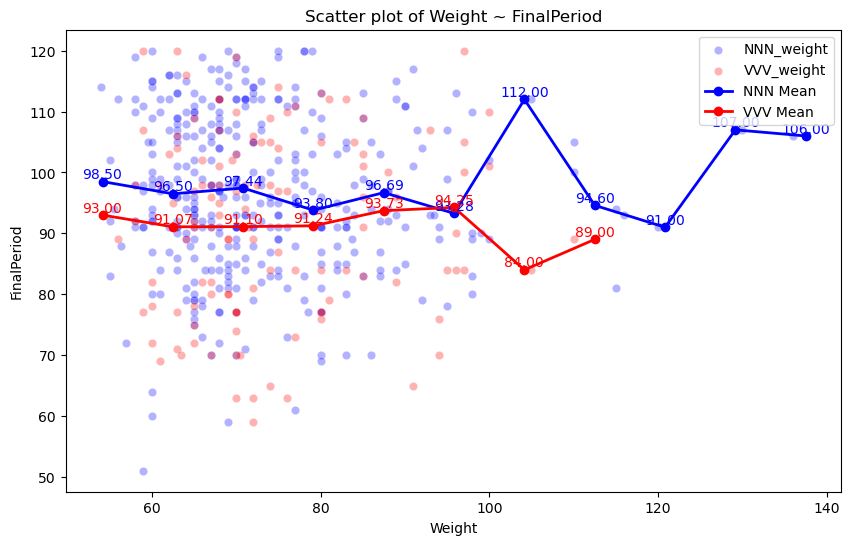

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 산점도 그리기
X = 'Weight'
Y = 'FinalPeriod'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=Y, data=NNN_weight, color='blue', label='NNN_weight', alpha = 0.3)
sns.scatterplot(x=X, y=Y, data=VVV_weight, color='red', label='VVV_weight', alpha = 0.3)

# 구간별 평균 계산 및 그리기
bin_edges = np.linspace(0, 200, 25)
NNN_bins = pd.cut(NNN_weight[X], bins=bin_edges)
VVV_bins = pd.cut(VVV_weight[X], bins=bin_edges)

NNN_means = NNN_weight.groupby(NNN_bins)[Y].mean()
VVV_means = VVV_weight.groupby(VVV_bins)[Y].mean()

# 각 구간의 중심값 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, NNN_means, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='NNN Mean')
plt.plot(bin_centers, VVV_means, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='VVV Mean')

# 평균값 숫자로 표시
for x, y in zip(bin_centers, NNN_means):
    plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom')

for x, y in zip(bin_centers, VVV_means):
    plt.text(x, y, f'{y:.2f}', color='red', ha='center', va='bottom')

# 그래프 설정
plt.xlabel(X)
plt.ylabel(Y)
plt.title(f'Scatter plot of {X} ~ {Y}')
plt.legend()
plt.savefig(f'{path}\\Scatter plot of {X} ~ {Y}.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()


C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\410176665.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  NNN_male_means = NNN_male.groupby(NNN_male_bins)[Y].mean()
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\410176665.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  NNN_female_means = NNN_female.groupby(NNN_female_bins)[Y].mean()
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\410176665.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

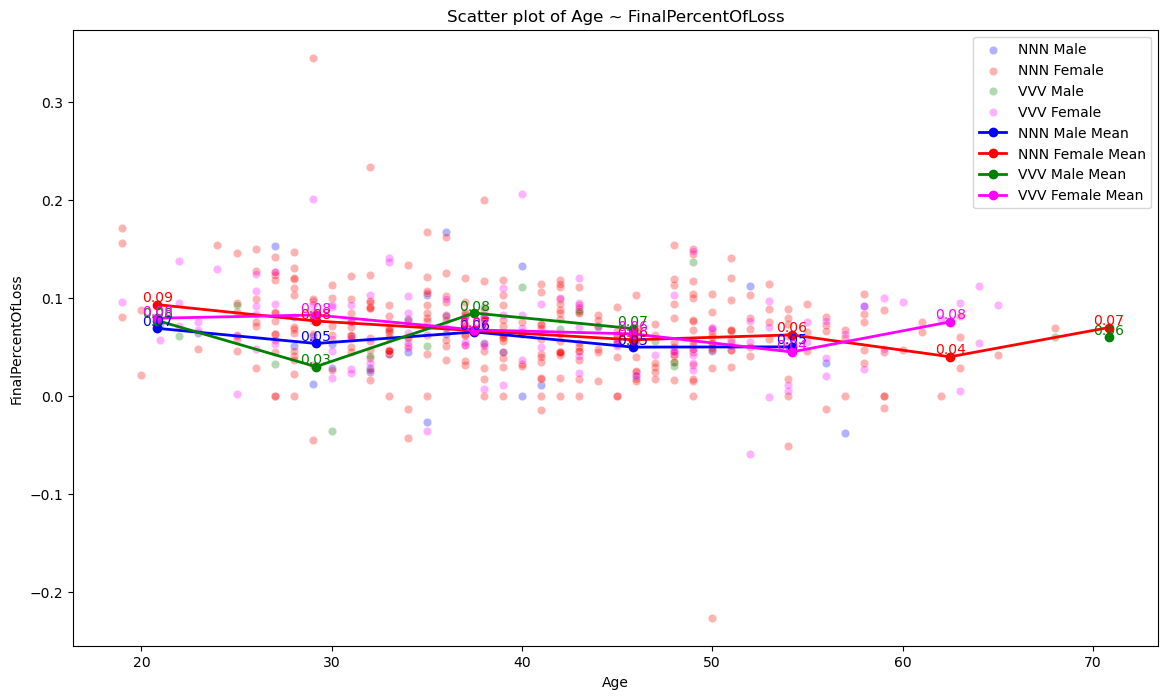

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 산점도 그리기
X = 'Age'
Y = 'FinalPercentOfLoss'
sex_column = 'Sex'  # 성별을 나타내는 컬럼

plt.figure(figsize=(14, 8))

# 성별에 따른 데이터 분할
NNN_male = NNN_weight[NNN_weight[sex_column] == 1]
NNN_female = NNN_weight[NNN_weight[sex_column] == 2]
VVV_male = VVV_weight[VVV_weight[sex_column] == 1]
VVV_female = VVV_weight[VVV_weight[sex_column] == 2]

# 산점도
sns.scatterplot(x=X, y=Y, data=NNN_male, color='blue', label='NNN Male', alpha=0.3)
sns.scatterplot(x=X, y=Y, data=NNN_female, color='red', label='NNN Female', alpha=0.3)
sns.scatterplot(x=X, y=Y, data=VVV_male, color='green', label='VVV Male', alpha=0.3)
sns.scatterplot(x=X, y=Y, data=VVV_female, color='magenta', label='VVV Female', alpha=0.3)

# 구간별 평균 계산 및 그리기
bin_edges = np.linspace(0, 200, 25)
NNN_male_bins = pd.cut(NNN_male[X], bins=bin_edges)
NNN_female_bins = pd.cut(NNN_female[X], bins=bin_edges)
VVV_male_bins = pd.cut(VVV_male[X], bins=bin_edges)
VVV_female_bins = pd.cut(VVV_female[X], bins=bin_edges)

NNN_male_means = NNN_male.groupby(NNN_male_bins)[Y].mean()
NNN_female_means = NNN_female.groupby(NNN_female_bins)[Y].mean()
VVV_male_means = VVV_male.groupby(VVV_male_bins)[Y].mean()
VVV_female_means = VVV_female.groupby(VVV_female_bins)[Y].mean()

# 각 구간의 중심값 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 평균값 그리기
plt.plot(bin_centers, NNN_male_means, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='NNN Male Mean')
plt.plot(bin_centers, NNN_female_means, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='NNN Female Mean')
plt.plot(bin_centers, VVV_male_means, color='green', marker='o', linestyle='-', linewidth=2, markersize=6, label='VVV Male Mean')
plt.plot(bin_centers, VVV_female_means, color='magenta', marker='o', linestyle='-', linewidth=2, markersize=6, label='VVV Female Mean')

# 평균값 숫자로 표시
for x, y in zip(bin_centers, NNN_male_means):
    plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom')

for x, y in zip(bin_centers, NNN_female_means):
    plt.text(x, y, f'{y:.2f}', color='red', ha='center', va='bottom')

for x, y in zip(bin_centers, VVV_male_means):
    plt.text(x, y, f'{y:.2f}', color='green', ha='center', va='bottom')

for x, y in zip(bin_centers, VVV_female_means):
    plt.text(x, y, f'{y:.2f}', color='magenta', ha='center', va='bottom')

# 그래프 설정
plt.xlabel(X)
plt.ylabel(Y)
plt.title(f'Scatter plot of {X} ~ {Y}')
plt.legend()
plt.savefig(f'{path}\\Scatter plot of {X} ~ {Y} by Sex.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()


In [68]:
NN_weight

,Age,Sex,Weight_1,Weight_2,Period_2,Weight,Period,AfterWeight,PercentOfLoss
0,31,2,86.0,85.00,56,86.0,56,85.00,0.011628
1,29,2,59.0,58.00,47,59.0,47,58.00,0.016949
2,28,2,63.0,61.95,33,63.0,33,61.95,0.016667
3,40,2,70.0,68.00,42,70.0,42,68.00,0.028571
4,51,2,75.0,73.00,58,75.0,58,73.00,0.026667
...,...,...,...,...,...,...,...,...,...
1234,50,2,72.0,67.00,32,72.0,32,67.00,0.069444
1235,28,2,82.0,75.00,61,82.0,61,75.00,0.085366
1236,33,1,75.0,66.00,58,75.0,58,66.00,0.120000
1237,34,2,74.0,68.50,63,74.0,63,68.50,0.074324


In [83]:
df = NN
df_weight = df[['Age','Sex','Weight_1','Weight_2','Period_2']]
df_weight['Weight'] = df_weight['Weight_1']
df_weight['Period'] = df_weight['Period_2']
df_weight['AfterWeight'] = df_weight['Weight_2']
df_weight['PercentOfLoss'] = (df_weight['Weight'] - df_weight['AfterWeight']) / df_weight['Weight']
NN_weight =df_weight
df = VV
df_weight = df[['Age','Sex','Weight_1','Weight_2','Period_2']]
df_weight['Weight'] = df_weight['Weight_1']
df_weight['Period'] = df_weight['Period_2']
df_weight['AfterWeight'] = df_weight['Weight_2']
df_weight['PercentOfLoss'] = (df_weight['Weight'] - df_weight['AfterWeight']) / df_weight['Weight']
VV_weight =df_weight

C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\854957993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['Weight'] = df_weight['Weight_1']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\854957993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['Period'] = df_weight['Period_2']
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\854957993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [84]:
NN_weight = NN_weight[NN_weight['PercentOfLoss']>-5] #268번 예외

In [85]:
NN_weight = NN_weight[NN_weight['PercentOfLoss']<0.3] # 30%이상 감량일 경우 필터로 잡은 체중의 양식이 평소와 다른 것을 확인 하고 과감히 삭제
# ex 60 -> 90으로 변경

C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\3892678737.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  NNN_means = NN_weight.groupby(NNN_bins)[Y].mean()
C:\Users\howsr\AppData\Local\Temp\ipykernel_47004\3892678737.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VVV_means = VV_weight.groupby(VVV_bins)[Y].mean()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should b

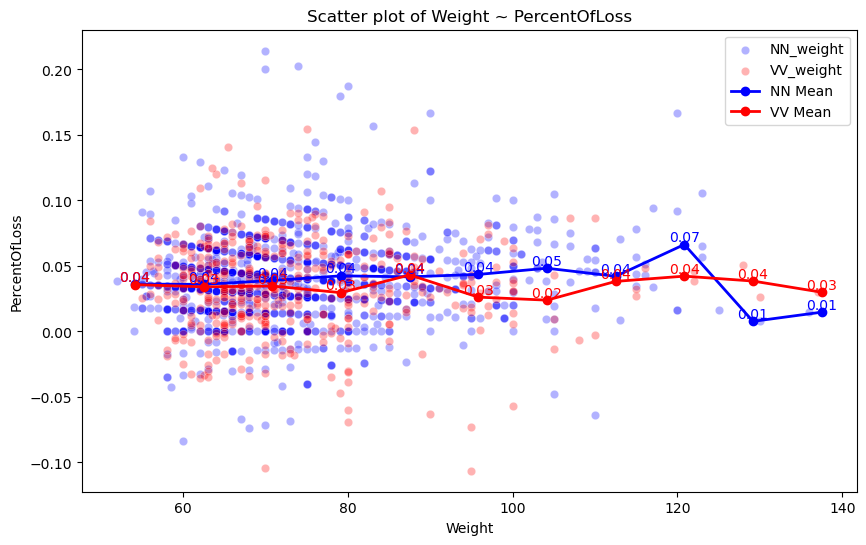

In [96]:

# 산점도 그리기
X = 'Weight'
Y = 'PercentOfLoss'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=Y, data=NN_weight, color='blue', label='NN_weight', alpha = 0.3)
sns.scatterplot(x=X, y=Y, data=VV_weight, color='red', label='VV_weight', alpha = 0.3)

# 구간별 평균 계산 및 그리기
bin_edges = np.linspace(0, 200, 25)
NNN_bins = pd.cut(NN_weight[X], bins=bin_edges)
VVV_bins = pd.cut(VV_weight[X], bins=bin_edges)

NNN_means = NN_weight.groupby(NNN_bins)[Y].mean()
VVV_means = VV_weight.groupby(VVV_bins)[Y].mean()

# 각 구간의 중심값 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, NNN_means, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='NN Mean')
plt.plot(bin_centers, VVV_means, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='VV Mean')

# 평균값 숫자로 표시
for x, y in zip(bin_centers, NNN_means):
    plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom')

for x, y in zip(bin_centers, VVV_means):
    plt.text(x, y, f'{y:.2f}', color='red', ha='center', va='bottom')

# 그래프 설정
plt.xlabel(X)
plt.ylabel(Y)
plt.title(f'Scatter plot of {X} ~ {Y}')
plt.legend()
plt.savefig(f'{path}\\1.5 Month Scatter plot of {X} ~ {Y}.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()